In [1]:
import pandas as pd
import datetime
import numpy as np
import os
import sys
today = str(datetime.datetime.now().date())
print(today)
%matplotlib inline

2018-06-20


In [2]:
CURR_PATH = os.path.dirname(os.path.abspath(__file__))
PROJ_ROOT = os.path.join(CURR_PATH, os.pardir, os.pardir)
DATA_RAW = os.path.join(PROJ_ROOT, "data", "raw")
PROCESSED = os.path.join(PROJ_ROOT, "data", "processed")
REPORTS = os.path.join(PROJ_ROOT, "reports")
FIGS = os.path.join(REPORTS, "figures")
path_components = PROJ_ROOT.split(os.sep)
ROOT = os.sep.join(path_components[:path_components.index("analyses")])

import stocks as stocks
import style as style
style.set_style()

Style set


In [68]:
QUOTES = pd.read_csv('ticks.csv',sep='\r', squeeze=True)
print(QUOTES.head())

interval_min = 60*24
interval_sec = 60*interval_min

0         AAK
1         ABB
2        ALFA
3    ALIV-SDB
4         AOI
Name: ticks, dtype: object


In [71]:
QUOTES.values

array(['AAK', 'ABB', 'ALFA', 'ALIV-SDB', 'AOI', 'ASSA-B', 'ATCO-A',
       'ATCO-B', 'AXFO', 'AXIS', 'AZN', 'BILL', 'BOL', 'CAST', 'COMH',
       'EKTA-B', 'ELUX-A', 'ELUX-B', 'ENQ', 'ERIC-A', 'ERIC-B', 'FABG',
       'GETI-B', 'HEXA-B', 'HM-B', 'HOLM-A', 'HOLM-B', 'HPOL-B', 'HUFV-A',
       'HUFV-C', 'HUSQ-A', 'HUSQ-B', 'ICA', 'IJ', 'INDU-A', 'INDU-C',
       'INVE-A', 'INVE-B', 'JM', 'KINV-A', 'KINV-B', 'LATO-B', 'LJGR-B',
       'LUMI-SDB', 'LUND-B', 'LUPE', 'MEDA-A', 'MELK', 'MIC-SDB', 'MTG-A',
       'MTG-B', 'NCC-A', 'NCC-B', 'NDA-SEK', 'NIBE-B', 'ORI-SDB',
       'PEAB-B', 'RATO-A', 'RATO-B', 'RATO-PREF', 'SAAB-B', 'SAND',
       'SCA-A', 'SCA-B', 'SEB-A', 'SEB-C', 'SECU-B', 'SHB-A', 'SHB-B',
       'SKA-B', 'SKF-A', 'SKF-B', 'SOBI', 'SSAB-A', 'SSAB-B', 'STE-A',
       'STE-R', 'SWED-A', 'SWMA', 'TEL2-A', 'TEL2-B', 'TIEN', 'TLSN',
       'TREL-B', 'VOLV-A', 'VOLV-B', 'WALL-B', 'ACTI', 'ADDT-B', 'AERO-B',
       'AF-B', 'ARCM', 'AZA', 'BACTI-B', 'BALD-B', 'BALD-PREF', 'BBTO-B',
 

In [72]:
df = pd.DataFrame()
ticks = len(QUOTES.values)
for quote in QUOTES.values:
    #print(quote)
    df = df.append(stocks.GoogleIntradayQuote(quote, '1d', '1Y'))
    ticks -= 1
    print(ticks)

http://finance.google.com/finance/getprices?q=AAK&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=ABB&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=ALFA&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=ALIV-SDB&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=AOI&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=ASSA-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=ATCO-A&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=ATCO-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=AXFO&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=AXIS&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=AZN&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BILL&x=STO&p=1Y&i=86400&

http://finance.google.com/finance/getprices?q=BEIA-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BEIJ-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BETS-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BILI-A&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BIOG-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BMAX&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BUFAB&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BURE&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=CATE&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=CCC&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=CDON&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=CLA-B&x=STO&p=1Y&i=8

http://finance.google.com/finance/getprices?q=BELE&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BESQ&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BINV&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BIOT&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BONG&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BORG&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BOUL&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BRG-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=BTS-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=CCOR-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=CEVI&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=CNTA&x=STO&p=1Y&i=86400&f=

http://finance.google.com/finance/getprices?q=TRAD&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=TWW-SDB-A&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=TWW-SDB-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=UFLX-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=VBG-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=VIT-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=VITR&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=VRG-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v
http://finance.google.com/finance/getprices?q=XANO-B&x=STO&p=1Y&i=86400&f=d,o,h,l,c,v


In [73]:
df.shape

(60492, 6)

In [79]:
df_stock = df.set_index('stock', append=True)['close'].unstack()
df_stock = df_stock.div(df_stock.mean())
df_stock.head()

stock,AAK,ABB,ACAN-B,ACTI,ADDT-B,AF-B,ALFA,ALIV-SDB,ANOD-B,ANOT,...,VICP-B,VICP-PREF,VIT-B,VITR,VOLV-A,VOLV-B,VRG-B,WALL-B,WIHL,XANO-B
datetime,,,,,,,,,,,,,,,,,,,,,
2017-06-26 17:30:00,0.955475,1.079664,0.948973,1.239619,0.937692,0.983194,0.909985,0.868590,1.037256,1.000419,...,0.915253,1.024819,0.855964,0.980358,0.967669,0.969097,1.217848,1.062643,0.956950,0.803063
2017-06-27 17:30:00,0.939117,1.066974,0.948973,1.288713,0.906341,0.969591,0.895993,0.856208,1.043659,0.995416,...,0.908852,1.018373,0.862013,0.970074,0.962453,0.963876,1.210599,1.049199,0.948421,0.812755
2017-06-28 17:30:00,0.933168,1.048914,0.938658,1.264166,0.912041,0.953268,0.887997,0.851622,1.021249,0.990414,...,0.902452,1.015151,0.865037,0.939224,0.969626,0.969749,1.130859,1.037037,0.944156,0.804447
2017-06-29 17:30:00,0.913836,1.024022,0.914590,1.210163,0.897791,0.941298,0.865010,0.844743,1.043659,1.040435,...,0.905652,1.002260,0.865037,0.915229,0.933110,0.935815,1.072866,1.027434,0.943089,0.815524
2017-06-30 17:30:00,0.914579,1.021093,0.907714,1.239619,0.914891,0.947283,0.861512,0.847494,1.027652,0.965404,...,0.899252,0.989369,0.871087,0.906659,0.938326,0.937120,1.051119,1.038957,0.948954,0.803063


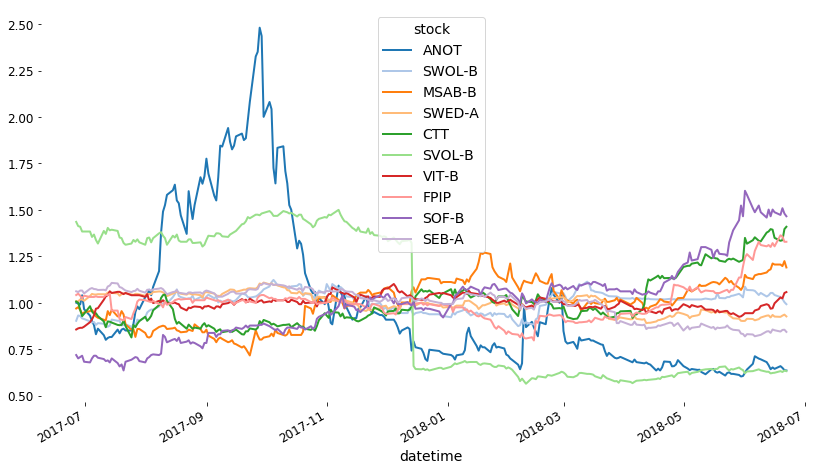

In [80]:
df_stock.sample(n=10, axis=1).rolling(1).mean().plot(lw=2)

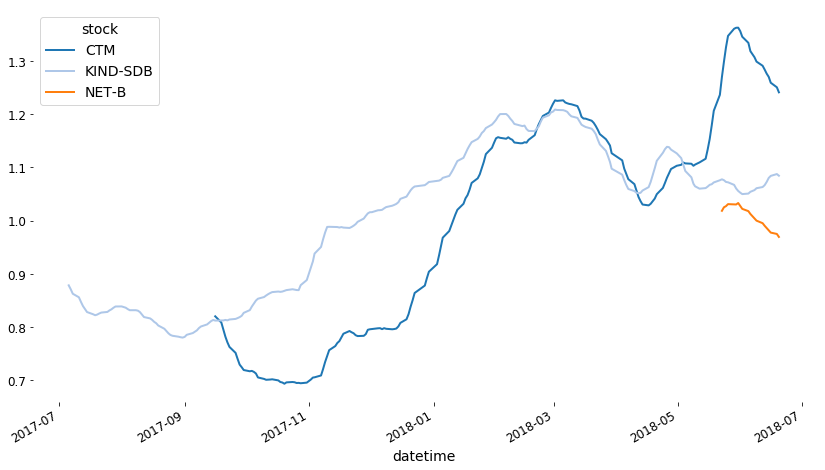

In [48]:
df_stock.rolling(10).mean().plot(lw=2)